In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [6]:
ds=pd.read_csv('salary_project.csv')

In [9]:
ds.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [11]:
ds.shape

(397, 6)

In [13]:
ds.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [14]:
ds.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [17]:
ds.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [18]:
ds.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [37]:
ds.loc[ds['salary']==' ']

,rank,discipline,yrs.since.phd,yrs.service,sex,salary


<AxesSubplot:xlabel='sex', ylabel='count'>

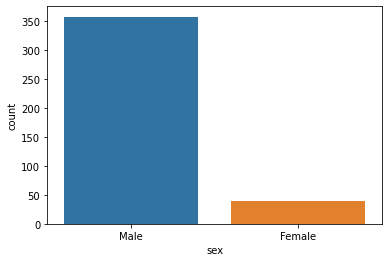

In [19]:
sns.countplot(x='sex',data=ds)

The gender in the data is not evenly distributed

<AxesSubplot:xlabel='discipline', ylabel='count'>

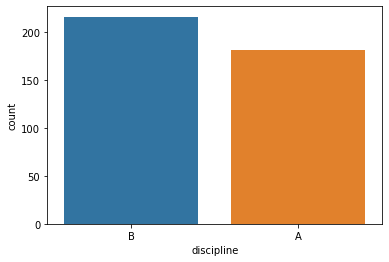

In [25]:
sns.countplot(x='discipline',data=ds)

There is a fair distribution in discipline

<AxesSubplot:xlabel='rank', ylabel='count'>

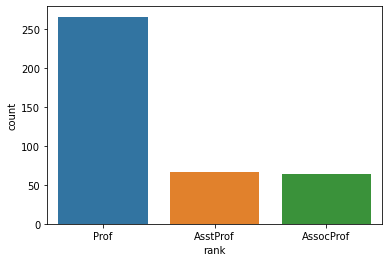

In [26]:
sns.countplot(x='rank',data=ds)

The data has is heavily skewed in favor of professors as against assistant and associate professors

<AxesSubplot:xlabel='salary', ylabel='Density'>

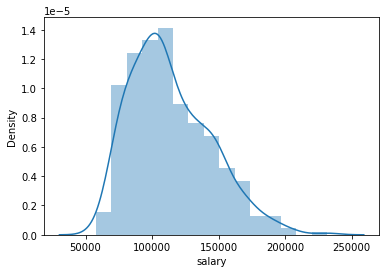

In [22]:
sns.distplot(ds['salary'])

The data does not follow a fair distribution curve

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

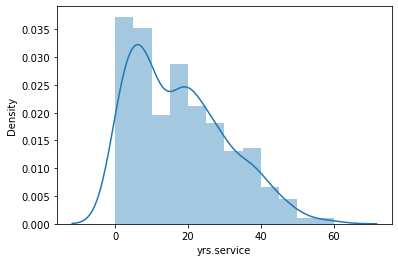

In [23]:
sns.distplot(ds['yrs.service'])

The data is not fairly distrinuted

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

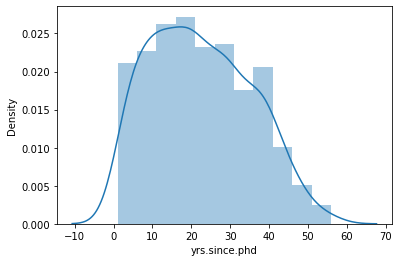

In [24]:
sns.distplot(ds['yrs.since.phd'])

The data seem well distributed

In [30]:
ds=pd.DataFrame(ds)
ds

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [38]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [39]:
for i in ds.columns:
    if ds[i].dtypes=='object':
        ds[i]=enc.fit_transform(ds[i].values.reshape(-1,1))

In [40]:
ds

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [42]:
ds.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

In [45]:
ds.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [41]:
ds.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

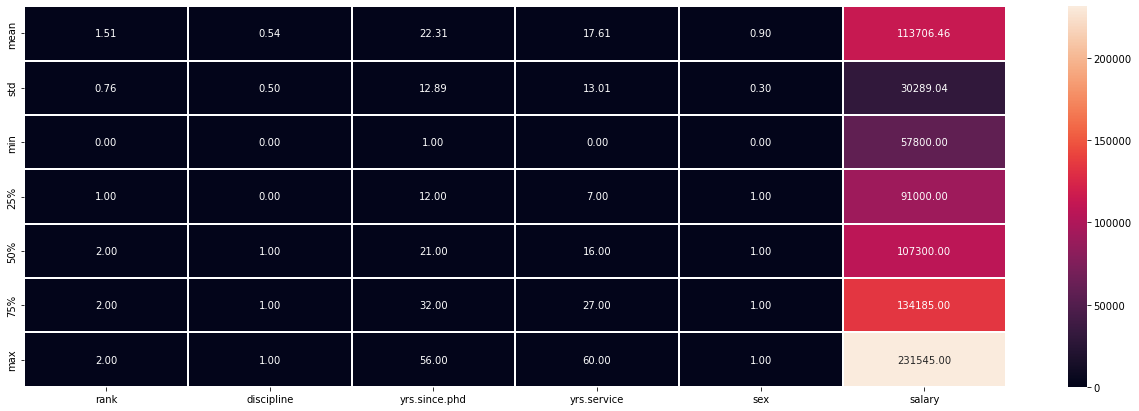

In [54]:
plt.figure(figsize=(22,7))
sns.heatmap(ds.describe()[1:],annot=True,linewidths=0.1,linecolor='white',fmt='0.2f')

<AxesSubplot:>

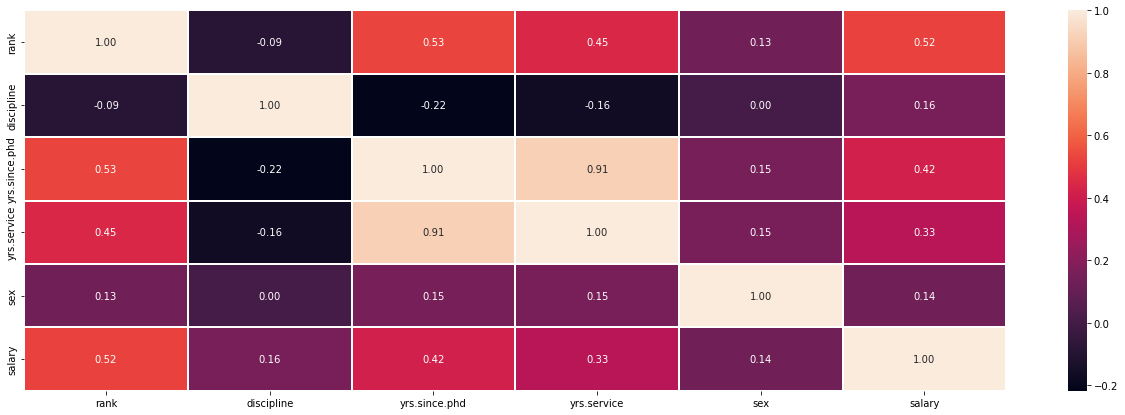

In [52]:
plt.figure(figsize=(22,7))
sns.heatmap(ds.corr(),annot=True,linewidths=0.1,linecolor='white',fmt='0.2f')

From the above, salary seems not to have a good correlation with the other variables. 
The correlation is seen to be lowest with sex and discipline.

In [55]:
# Correlation with the target column:

In [56]:
ds.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

In [58]:
ds.skew().sort_values(ascending=False)

salary           0.714568
yrs.service      0.650569
yrs.since.phd    0.300880
discipline      -0.177684
rank            -1.151164
sex             -2.709958
dtype: float64

Keeping +/-0.65 as the range for skewness, here are the columns which does not lie within this range;

* salary
* rank
* sex


In [59]:
#Checking Outliers:

<AxesSubplot:>

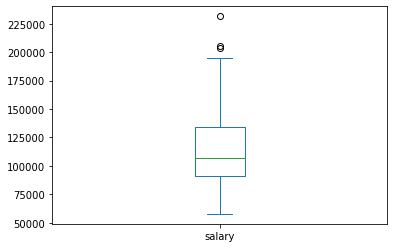

In [60]:
ds['salary'].plot.box()

<AxesSubplot:>

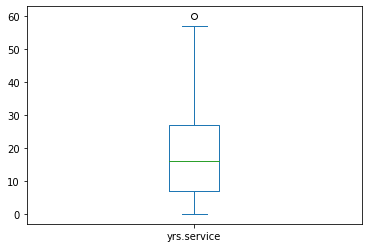

In [61]:
ds['yrs.service'].plot.box()

<AxesSubplot:>

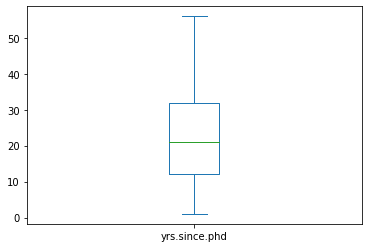

In [62]:
ds['yrs.since.phd'].plot.box()

<AxesSubplot:>

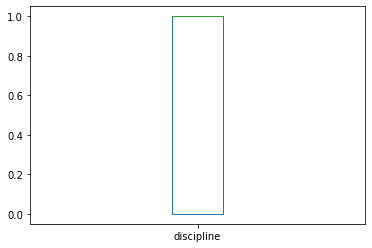

In [63]:
ds['discipline'].plot.box()

<AxesSubplot:>

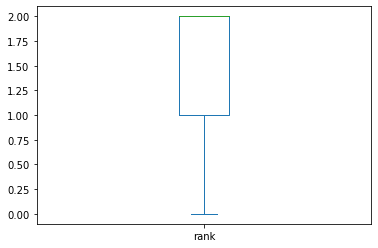

In [64]:
ds['rank'].plot.box()

<AxesSubplot:>

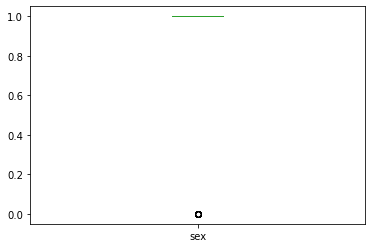

In [65]:
ds['sex'].plot.box()

In [66]:
ds.shape

(397, 6)

In [67]:
#Removing Outliers:

In [69]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(ds))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364]),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5]))

In [70]:
ds_new=ds[(z<3).all(axis=1)]

In [71]:
ds.shape

(397, 6)

In [72]:
ds_new.shape

(354, 6)

In [73]:
x=ds_new.iloc[:,0:-1]

In [74]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,1.0,19,18,1.0
1,2.0,1.0,20,16,1.0
2,1.0,1.0,4,3,1.0
3,2.0,1.0,45,39,1.0
4,2.0,1.0,40,41,1.0
...,...,...,...,...,...
392,2.0,0.0,33,30,1.0
393,2.0,0.0,31,19,1.0
394,2.0,0.0,42,25,1.0
395,2.0,0.0,25,15,1.0


In [75]:
y=ds_new.iloc[:,-1]

In [76]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 354, dtype: int64

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=45)

In [78]:
x_train.shape

(334, 5)

In [79]:
x_test.shape

(20, 5)

In [80]:
y_train.shape

(334,)

In [81]:
y_test.shape

(20,)

In [82]:
lr=LinearRegression()

In [83]:
lr.fit(x_train,y_train)

LinearRegression()

In [84]:
ds.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [85]:
pred=lr.predict(x_test)
print('Predicted Salary: ',pred)
print('Actual Salary: ',y_test)

Predicted Salary:  [119800.41922748 117784.53516541 122164.23129701  89609.33937947
 117961.82571662 126641.2874388  126111.94560093 115680.00582773
 100657.20462655 124007.41626325 131552.85522404 105566.24259602
 113659.53031027 104338.98310365 118839.09556194 117695.8898898
 122688.9816795  103788.60453441 123130.14641794  88361.5113319 ]
Actual Salary:  22      93904
305    111350
85     132825
376     74856
113    104279
238     77202
320    104428
116    148500
61      75243
155    118971
4      141500
11      79800
110    112429
83      88825
250    109000
105    113543
235     81700
162     98510
44      94384
54     103760
Name: salary, dtype: int64
